# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [25]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import json

# Import API key
from api_keys import geoapify_key

In [21]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

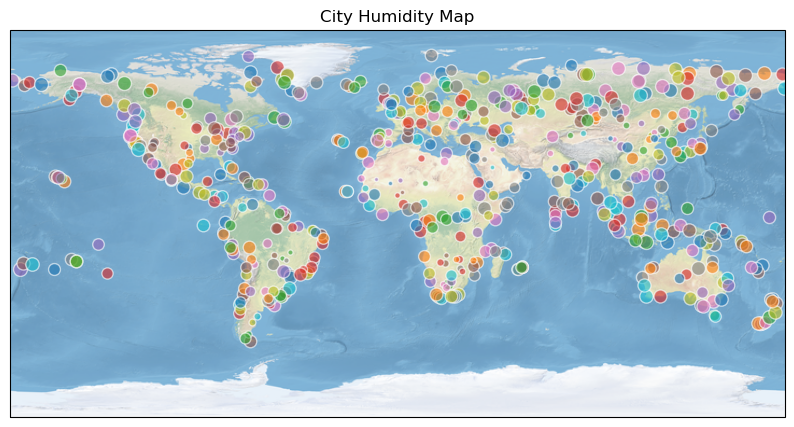

In [22]:
# Configure the map plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assuming city_data_df is your DataFrame and it has columns 'Lat', 'Lng', and 'Humidity'
fig = plt.figure(figsize=(10, 7))

# Create a map using the PlateCarree projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add a background image
ax.stock_img()

# Loop through the cities and plot each one
for index, row in city_data_df.iterrows():
    ax.scatter(row['Lng'], row['Lat'], s=row['Humidity'], alpha=0.6, edgecolors='w', transform=ccrs.PlateCarree())

plt.title('City Humidity Map')
plt.show()





### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [23]:
# Narrow down cities that fit criteria and drop any results with null values

# Prefered ideal weather conditions
max_temp_high = 33
max_temp_low = 15
wind_speed_limit = 10
cloudiness_limit = 0
humidity_limit = 70

# Filter the DataFrame to match the conditions
ideal_weather_df = city_data_df[
    (city_data_df['Max Temp'] < max_temp_high) &
    (city_data_df['Max Temp'] > max_temp_low) &
    (city_data_df['Wind Speed'] < wind_speed_limit) &
    (city_data_df['Cloudiness'] == cloudiness_limit) &
    (city_data_df['Humidity'] < humidity_limit)
]

cleandataset=ideal_weather_df.dropna(subset=['Max Temp', 'Wind Speed', 'Cloudiness', 'Humidity'])

cleandataset

,City_ID,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
9,9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
63,63,63,banda,25.4833,80.3333,24.62,52,0,2.68,IN,1666108268
73,73,73,nalut,30.3333,10.8500,25.41,27,0,5.11,LY,1666108275
152,152,152,kahului,20.8947,-156.4700,23.80,60,0,3.09,US,1666108246
240,240,240,tikaitnagar,26.9500,81.5833,23.56,59,0,0.35,IN,1666108378
258,258,258,comodoro rivadavia,-45.8667,-67.5000,25.92,24,0,7.20,AR,1666108389
303,303,303,alice springs,-23.7000,133.8833,15.75,63,0,4.63,AU,1666108416
340,340,340,santa rosalia,27.3167,-112.2833,24.62,56,0,0.74,MX,1666108436
363,363,363,narwar,25.6500,77.9000,22.35,55,0,1.29,IN,1666108449
380,380,380,yulara,-25.2406,130.9889,17.30,57,0,5.62,AU,1666108458


### Step 3: Create a new DataFrame called `hotel_df`.

In [24]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = cleandataset[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df["Hotel Name"] = ""

hotel_df

,City,Country,Lat,Lng,Humidity,Hotel Name
9,saint-pierre,RE,-21.3393,55.4781,68,
63,banda,IN,25.4833,80.3333,52,
73,nalut,LY,30.3333,10.8500,27,
152,kahului,US,20.8947,-156.4700,60,
240,tikaitnagar,IN,26.9500,81.5833,59,
258,comodoro rivadavia,AR,-45.8667,-67.5000,24,
303,alice springs,AU,-23.7000,133.8833,63,
340,santa rosalia,MX,27.3167,-112.2833,56,
363,narwar,IN,25.6500,77.9000,55,
380,yulara,AU,-25.2406,130.9889,57,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

AS THE BELOW CODE DID NOT WORK WELL, TRYING THE ALTERNATE WAY TO RETRIEVE THE HOTEL NAMES

In [39]:
import requests
import pandas as pd



base_url = "https://api.geoapify.com/v2/places"

# Function to find hotel names
def find_hotel(lat, lon, api_key):
    params = {
        "categories": "accommodation.hotel,motel,hostel,guest_house",
        "filter": f"circle:{lon},{lat},10000",  
        "limit": "1",
        "bias": bias
        "apiKey": 'd7208f423e6344ba8fdd8fc3058cd2ab'
    }

    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        if data['features']:
            hotel_name = data['features'][0]['properties']['name']
            return hotel_name
    return "No hotel found"

# Add a new column to the DataFrame for the hotel names
hotel_df['Hotel Name'] = hotel_df.apply(lambda row: find_hotel(row['Lat'], row['Lng'], geoapify_key), axis=1)

# Now you can print the DataFrame to see the hotel names
print(hotel_df)



                   City Country      Lat       Lng  Humidity      Hotel Name
9          saint-pierre      RE -21.3393   55.4781        68  No hotel found
63                banda      IN  25.4833   80.3333        52  No hotel found
73                nalut      LY  30.3333   10.8500        27  No hotel found
152             kahului      US  20.8947 -156.4700        60  No hotel found
240         tikaitnagar      IN  26.9500   81.5833        59  No hotel found
258  comodoro rivadavia      AR -45.8667  -67.5000        24  No hotel found
303       alice springs      AU -23.7000  133.8833        63  No hotel found
340       santa rosalia      MX  27.3167 -112.2833        56  No hotel found
363              narwar      IN  25.6500   77.9000        55  No hotel found
380              yulara      AU -25.2406  130.9889        57  No hotel found
381           roebourne      AU -20.7833  117.1333        65  No hotel found
391      saint-francois      FR  46.4154    3.9054        57  No hotel found

ALTERNATE CODE TO RETRIEVE HOTEL NAMES

In [61]:
radius = 10000

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    latitude = row["Lat"]
    longitude = row["Lng"]
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{longitude},{latitude},{radius}"
    params["bias"] = f"proximity:{longitude},{latitude}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"
params = {
    "categories": "accommodation.hotel,motel,hostel,guest_house",
         
        "limit": "1",
        "apiKey": 'd7208f423e6344ba8fdd8fc3058cd2ab'
}


    # Make and API request using the params dictionaty
name_address = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
name_address = response.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
pali - nearest hotel: Hotel Pawan International


,City,Country,Lat,Lng,Humidity,Hotel Name
9,saint-pierre,RE,-21.3393,55.4781,68,No hotel found
63,banda,IN,25.4833,80.3333,52,No hotel found
73,nalut,LY,30.3333,10.8500,27,No hotel found
152,kahului,US,20.8947,-156.4700,60,No hotel found
240,tikaitnagar,IN,26.9500,81.5833,59,No hotel found
258,comodoro rivadavia,AR,-45.8667,-67.5000,24,No hotel found
303,alice springs,AU,-23.7000,133.8833,63,No hotel found
340,santa rosalia,MX,27.3167,-112.2833,56,No hotel found
363,narwar,IN,25.6500,77.9000,55,No hotel found
380,yulara,AU,-25.2406,130.9889,57,No hotel found


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
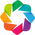

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Hotel Name,Country)

In [73]:
import pandas as pd
import hvplot.pandas  
import holoviews as hv
hv.extension('bokeh')
hotel_df=hotel_df.copy()
# The following line creates an interactive plot using hvPlot
map_plot_1 = hotel_df.hvplot.points('Lng', 'Lat', geo=True, size=50, color='blue', hover_cols=['City', 'Hotel Name', 'Country'], tiles='OSM')

%opts Overlay [width=700 height=400]  # Adjust the size as needed


# Show the plot
map_plot_1
